In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

In [4]:
# Función para cargar datos y mostrar las primeras filas
def load_and_preview(file_path, n_rows=5):
    df = pd.read_csv(file_path)
    print(f'Archivo: {file_path}')
    print(f'Número de filas: {df.shape[0]}, Número de columnas: {df.shape[1]}')
    print(df.head(n_rows))
    return df

In [5]:
# Función para graficar la distribución de cada columna
def plot_column_distribution(df, max_unique=50):
    df = df.loc[:, df.nunique() <= max_unique]  # Filtrar columnas con pocos valores únicos
    num_cols = len(df.columns)
    num_rows = int(np.ceil(num_cols / 3))
    
    plt.figure(figsize=(15, num_rows * 5))
    for i, col in enumerate(df.columns):
        plt.subplot(num_rows, 3, i + 1)
        if pd.api.types.is_numeric_dtype(df[col]):
            sns.histplot(df[col].dropna(), kde=True, bins=30)
        else:
            sns.countplot(y=df[col])
        plt.title(f'Distribución de {col}')
    
    plt.tight_layout()
    plt.show()


In [6]:
# Función para graficar la matriz de correlación
def plot_correlation_matrix(df):
    corr = df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, center=0)
    plt.title('Matriz de Correlación')
    plt.show()

In [7]:
# Función para graficar la matriz de dispersión
def plot_scatter_matrix(df):
    num_cols = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]
    if len(num_cols) > 1:
        pd.plotting.scatter_matrix(df[num_cols], alpha=0.8, figsize=(12, 12), diagonal='kde')
        plt.suptitle('Matriz de Dispersión')
        plt.show()
    else:
        print('No hay suficientes columnas numéricas para la matriz de dispersión.')

In [8]:
file_paths = {
    'GreenhouseClimate': 'kaggle/input/AICU/GreenhouseClimate.csv',
    'LabAnalysis': 'kaggle/input/AICU/LabAnalysis.csv',
    'TomQuality': 'kaggle/input/AICU/TomQuality.csv'
}


Explorando GreenhouseClimate


C:\Users\TANIA CUSTUZA\AppData\Local\Temp\ipykernel_2808\853573816.py:3: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,14,15,17,18,20,22,23,25,27,29,31,33,35,37,39,41,43,44,45,47,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Archivo: kaggle/input/AICU/GreenhouseClimate.csv
Número de filas: 47809, Número de columnas: 50
         %time AssimLight BlackScr CO2air Cum_irr EC_drain_PC EnScr HumDef  \
0  43815.00000        100       35    509    31.6         0.3    96    8.8   
1  43815.00347        100       85    484    31.8         0.3    96    9.2   
2  43815.00694        100       96    475    31.8         0.3    96    9.1   
3  43815.01042        100       96    501    32.0         0.3    96    8.5   
4  43815.01389        100       96    487    32.0         0.3    96    8.5   

  PipeGrow PipeLow  ... t_rail_min_sp t_rail_min_vip t_vent_sp  t_ventlee_vip  \
0      0.0    49.9  ...           NaN            0.0       NaN           25.0   
1      0.0    48.5  ...           NaN            0.0       NaN           25.0   
2      0.0    46.8  ...           NaN            0.0       NaN           25.0   
3      0.0    45.2  ...           NaN            0.0       NaN           25.0   
4      0.0    43.8  ...       

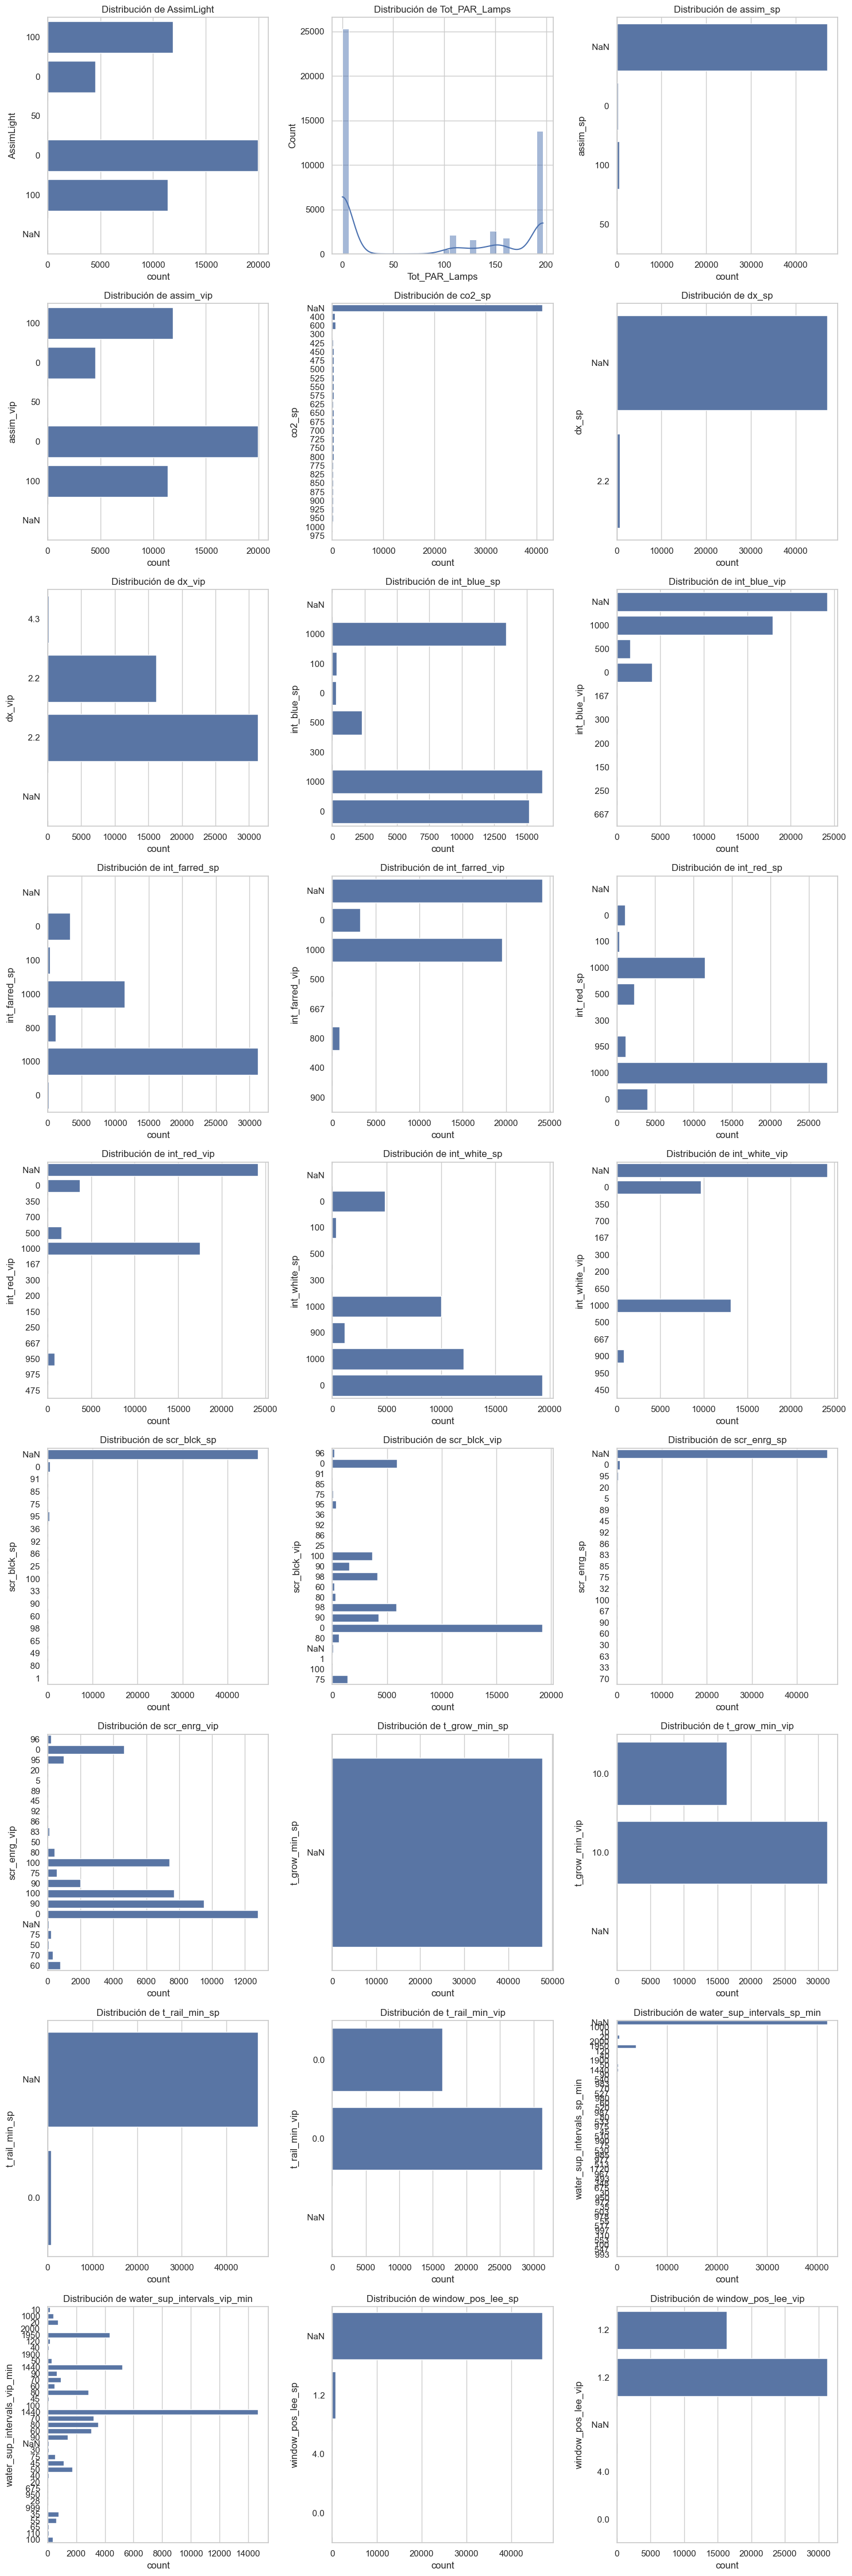

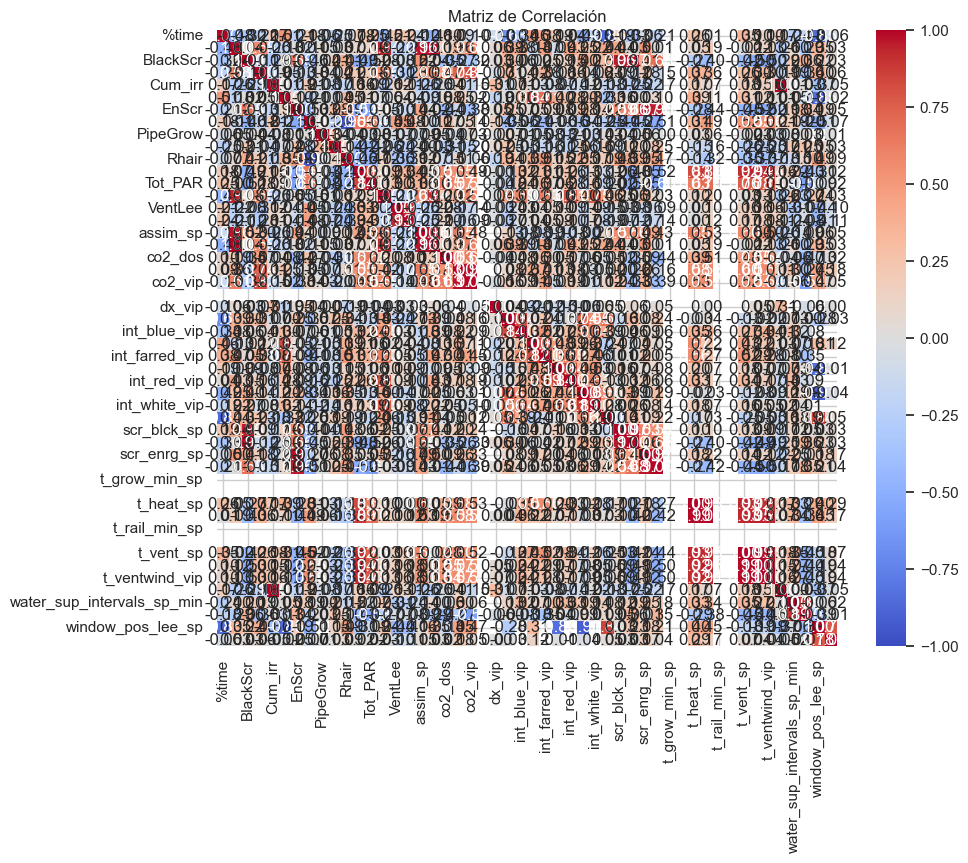

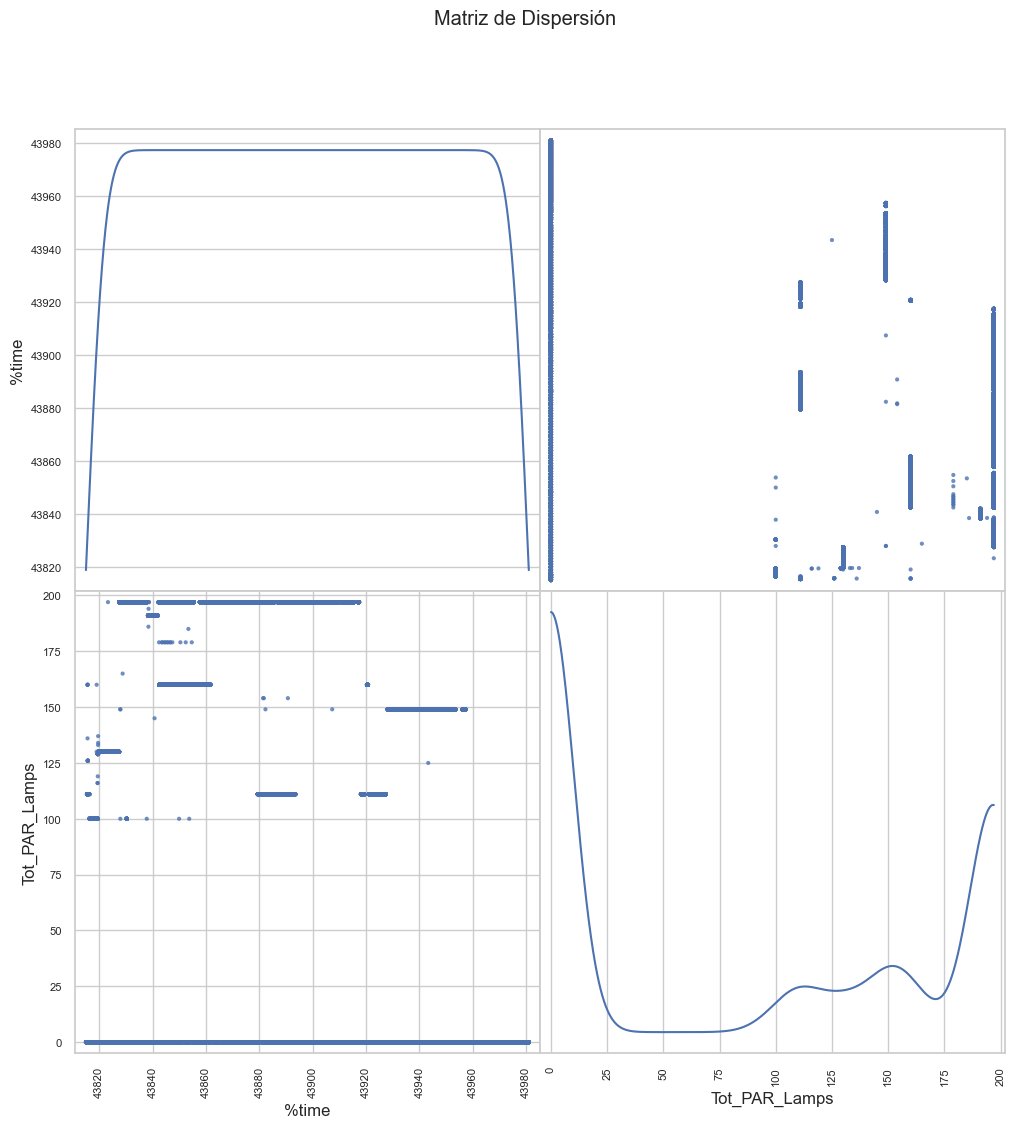


Explorando LabAnalysis
Archivo: kaggle/input/AICU/LabAnalysis.csv
Número de filas: 10, Número de columnas: 39
   %Time  irr_PH  irr_EC  irr_NH4  irr_K  irr_Na  irr_Ca  irr_Mg  irr_Si  \
0  43836     5.3     4.3      1.1   15.2     0.3     9.6     4.9    0.09   
1  43850     5.2     4.0      1.1   11.3     0.3     9.8     4.1    0.09   
2  43864     4.8     3.9      1.3   11.6     0.3    10.2     3.5    0.09   
3  43879     4.8     3.7      1.4   13.3     0.4     8.2     2.8    0.09   
4  43893     4.7     3.5      1.1   11.3     0.4     7.6     2.5    0.01   

   irr_NO3  ...  drain_Cl  drain_SO4  drain_HCO3  drain_PO4  drain_Fe  \
0     21.7  ...       7.6       13.5         1.4       2.00      27.8   
1     21.0  ...      10.0       23.4         1.3       0.42      21.1   
2     18.6  ...      12.0       17.5         1.0       1.30      18.3   
3     16.0  ...      20.0       13.2         0.1       6.10      24.4   
4     14.1  ...      21.2       11.6         0.1       9.32      31

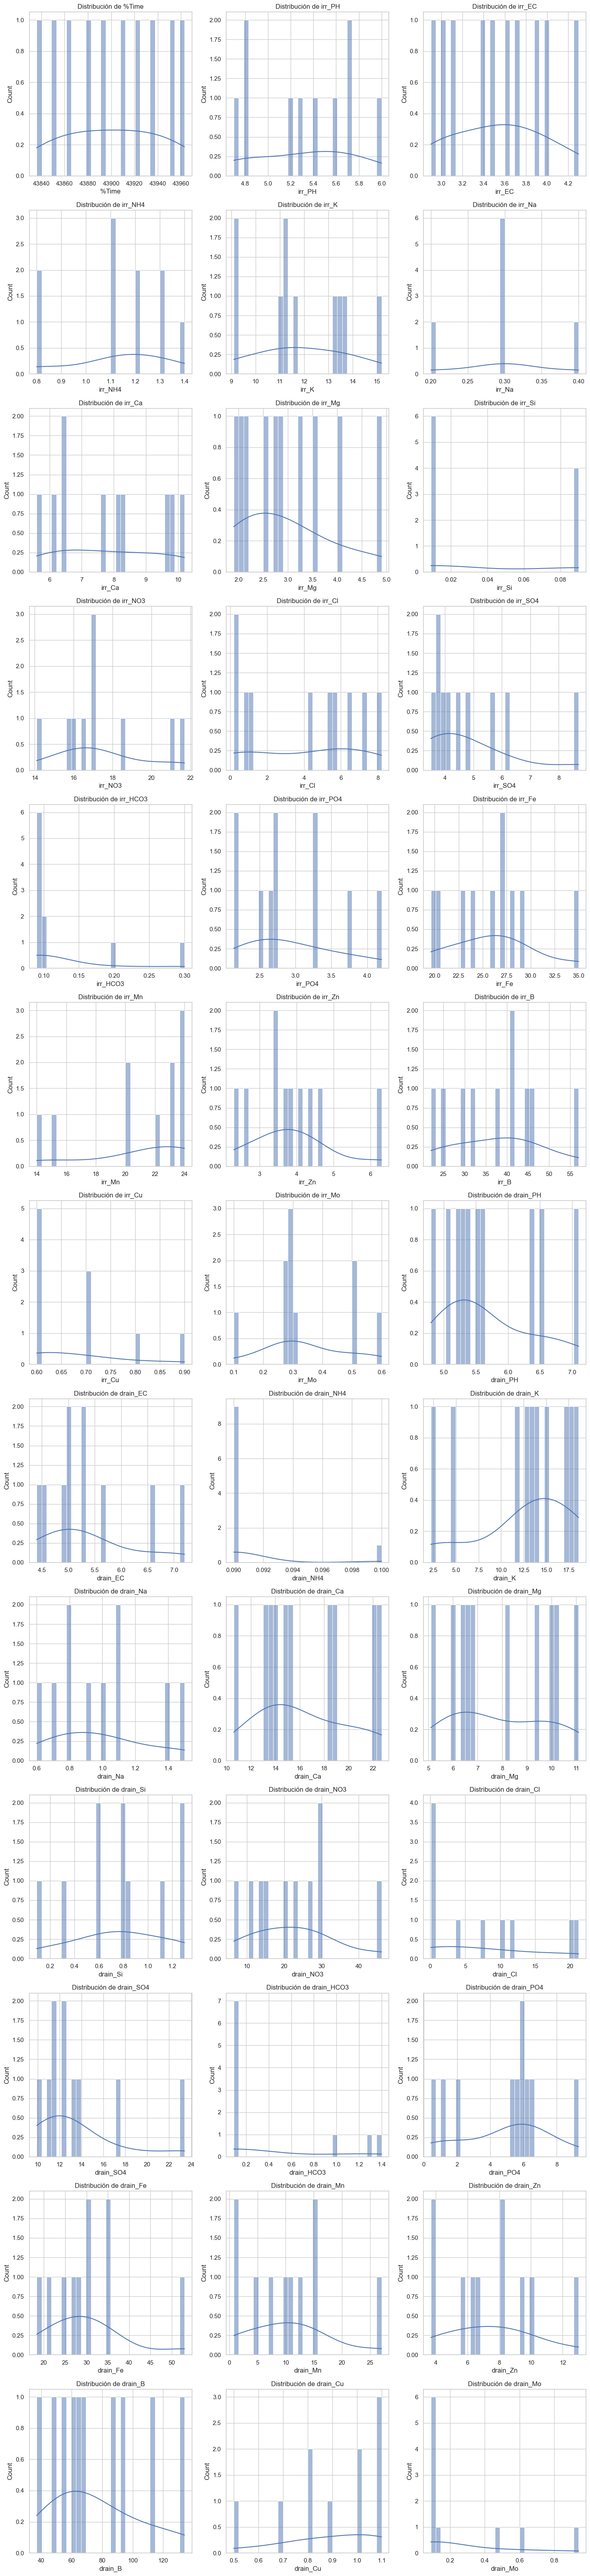

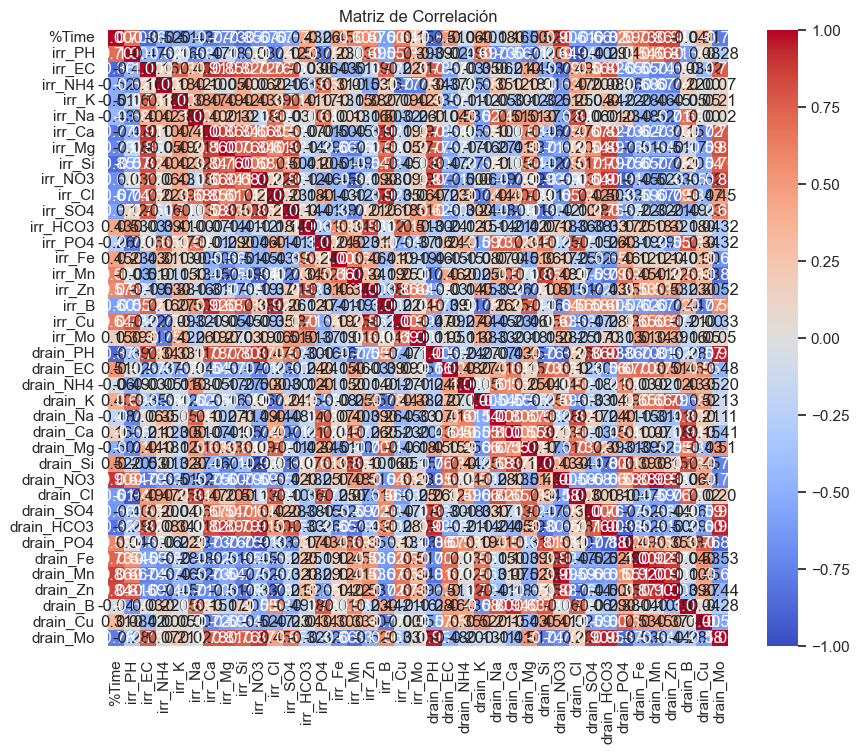

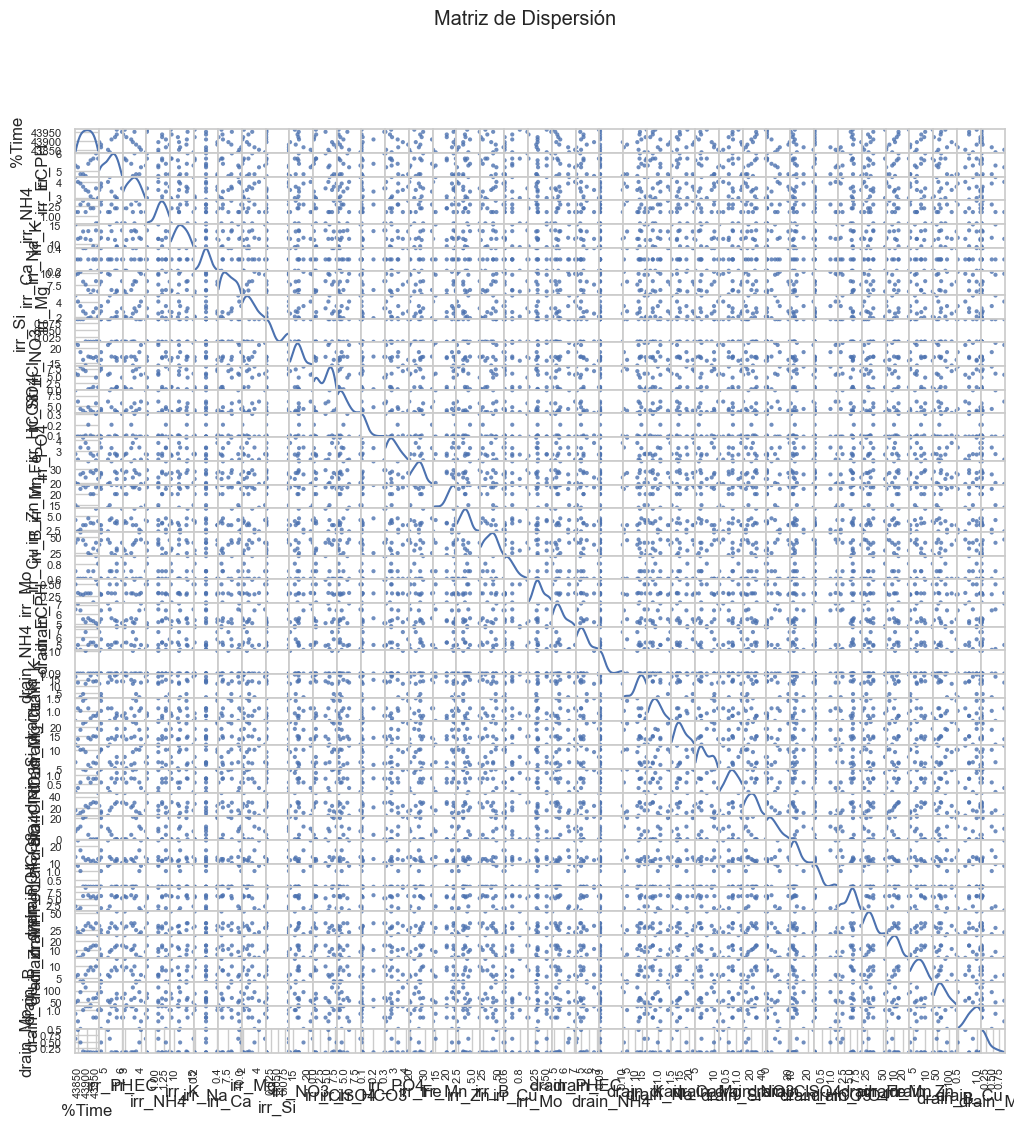


Explorando TomQuality
Archivo: kaggle/input/AICU/TomQuality.csv
Número de filas: 8, Número de columnas: 8
   %time  Flavour   TSS  Acid  %Juice  Bite  Weight DMC_fruit
0  43880        80  9.0  14.5      67   219     9.0       NaN
1  43894        74  8.3  13.6      60   277    10.1       NaN
2  43908        71  8.3  12.1      53   285    11.4      8.73
3  43922        76  8.9  13.3      58   334    10.0      9.07
4  43936        73  8.9  12.5      51   290    11.0      8.71


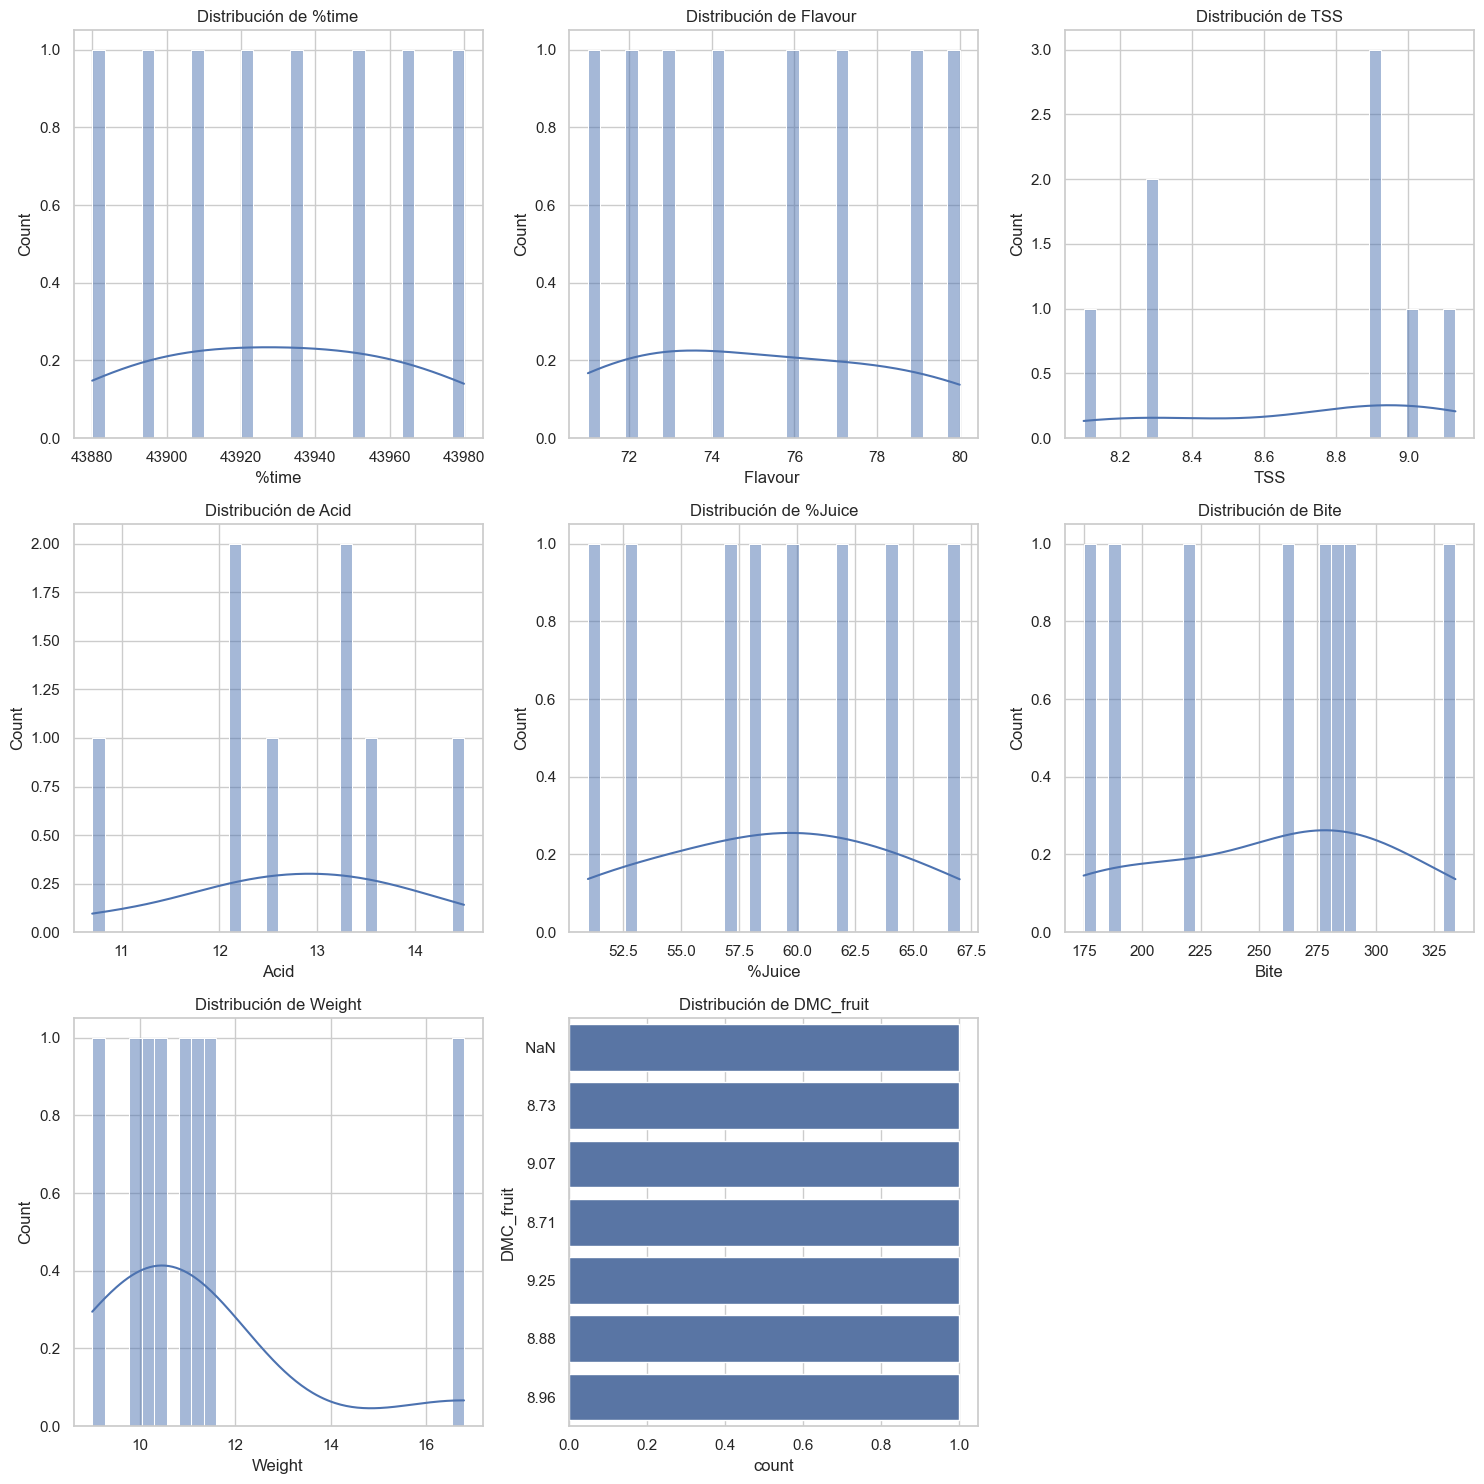

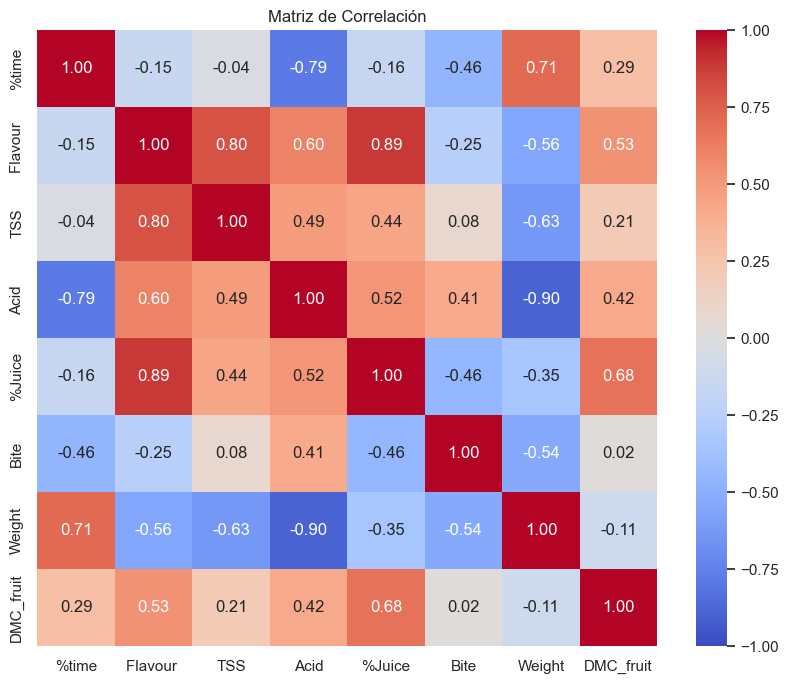

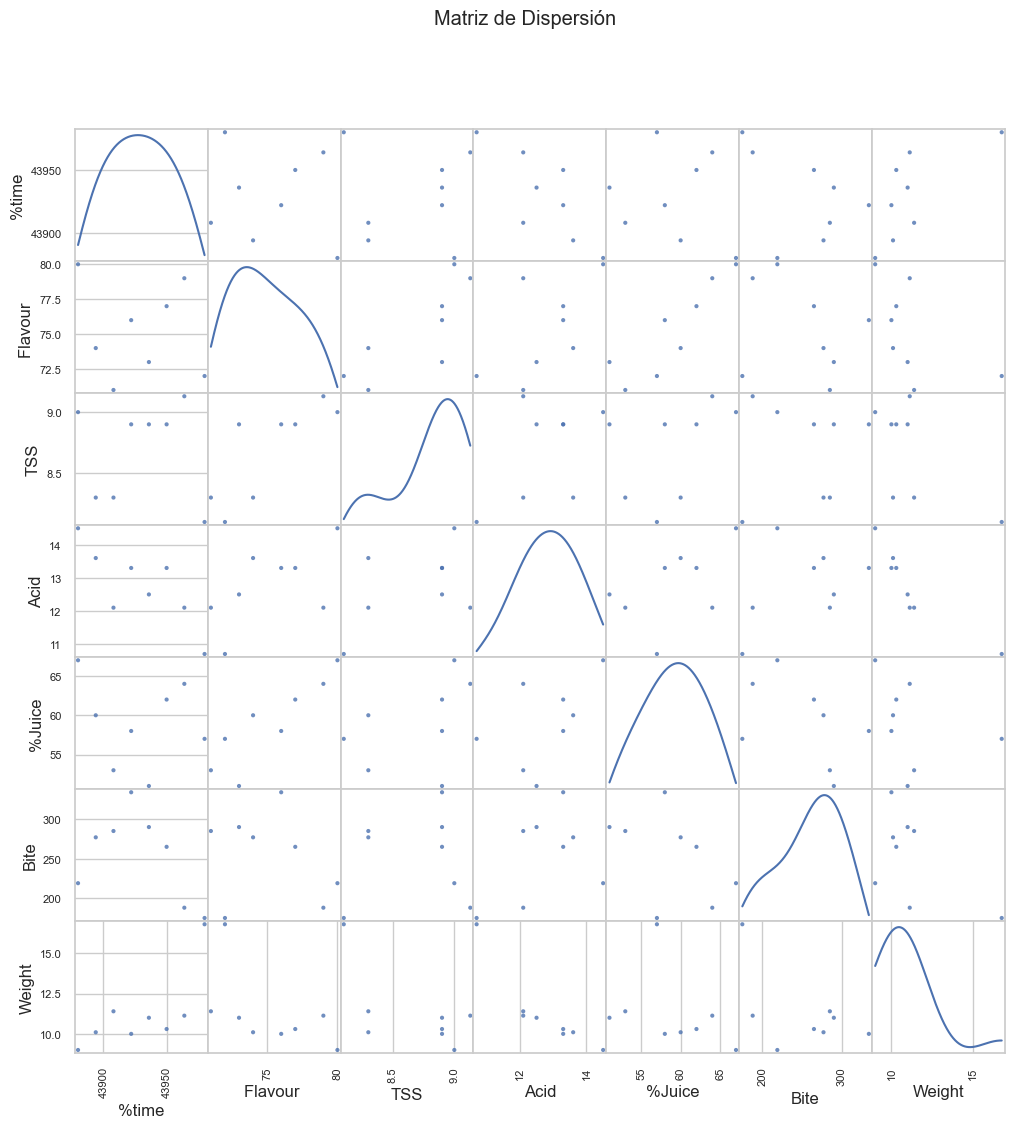

In [9]:
# Cargar y explorar datos
for name, path in file_paths.items():
    print(f'\nExplorando {name}')
    df = load_and_preview(path)
    plot_column_distribution(df)
    plot_correlation_matrix(df)
    plot_scatter_matrix(df)

EJEMPLO DE ANALISIS CON ALGUNOS DATOS

In [11]:
# Análisis Descriptivo
print(df.describe())



              %time   Flavour        TSS       Acid     %Juice        Bite  \
count      8.000000   8.000000  8.000000   8.000000   8.000000    8.000000   
mean   43929.250000  75.250000  8.691250  12.762500  59.000000  254.125000   
std       34.705907   3.284161  0.391752   1.164888   5.398412   54.940065   
min    43880.000000  71.000000  8.100000  10.700000  51.000000  175.000000   
25%    43904.500000  72.750000  8.300000  12.100000  56.000000  211.250000   
50%    43929.000000  75.000000  8.900000  12.900000  59.000000  271.000000   
75%    43953.500000  77.500000  8.925000  13.375000  62.500000  286.250000   
max    43980.000000  80.000000  9.130000  14.500000  67.000000  334.000000   

          Weight  
count   8.000000  
mean   11.216250  
std     2.382759  
min     9.000000  
25%    10.075000  
50%    10.650000  
75%    11.197500  
max    16.800000  


In [33]:
# Función para cargar datos y mostrar las primeras filas
def load_and_preview(file_path, n_rows=5):
    df = pd.read_csv(file_path)
    print(f'Archivo: {file_path}')
    print(f'Número de filas: {df.shape[0]}, Número de columnas: {df.shape[1]}')
    print(df.head(n_rows))
    return df


In [34]:
# Cargar los datos
file_path = 'kaggle/input/AICU/GreenhouseClimate.csv'  # Esta ruta para el ejemplo
df = load_and_preview(file_path)


Archivo: kaggle/input/AICU/GreenhouseClimate.csv
Número de filas: 47809, Número de columnas: 50
         %time AssimLight BlackScr CO2air Cum_irr EC_drain_PC EnScr HumDef  \
0  43815.00000        100       35    509    31.6         0.3    96    8.8   
1  43815.00347        100       85    484    31.8         0.3    96    9.2   
2  43815.00694        100       96    475    31.8         0.3    96    9.1   
3  43815.01042        100       96    501    32.0         0.3    96    8.5   
4  43815.01389        100       96    487    32.0         0.3    96    8.5   

  PipeGrow PipeLow  ... t_rail_min_sp t_rail_min_vip t_vent_sp  t_ventlee_vip  \
0      0.0    49.9  ...           NaN            0.0       NaN           25.0   
1      0.0    48.5  ...           NaN            0.0       NaN           25.0   
2      0.0    46.8  ...           NaN            0.0       NaN           25.0   
3      0.0    45.2  ...           NaN            0.0       NaN           25.0   
4      0.0    43.8  ...       

C:\Users\TANIA CUSTUZA\AppData\Local\Temp\ipykernel_2808\792797090.py:3: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,14,15,17,18,20,22,23,25,27,29,31,33,35,37,39,41,43,44,45,47,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [35]:
# Convertir %time a datetime 
df['%time'] = pd.to_datetime(df['%time'], errors='coerce')

In [36]:
# Establecer %time como índice
df.set_index('%time', inplace=True)

In [37]:
# Función para graficar tendencias temporales
def plot_time_trends(df, columns, title='Tendencias Temporales'):
    plt.figure(figsize=(15, 10))
    for column in columns:
        if column in df.columns:
            plt.plot(df.index, df[column], label=column)
    plt.title(title)
    plt.xlabel('Tiempo')
    plt.ylabel('Valor')
    plt.legend()
    plt.grid(True)
    plt.show()

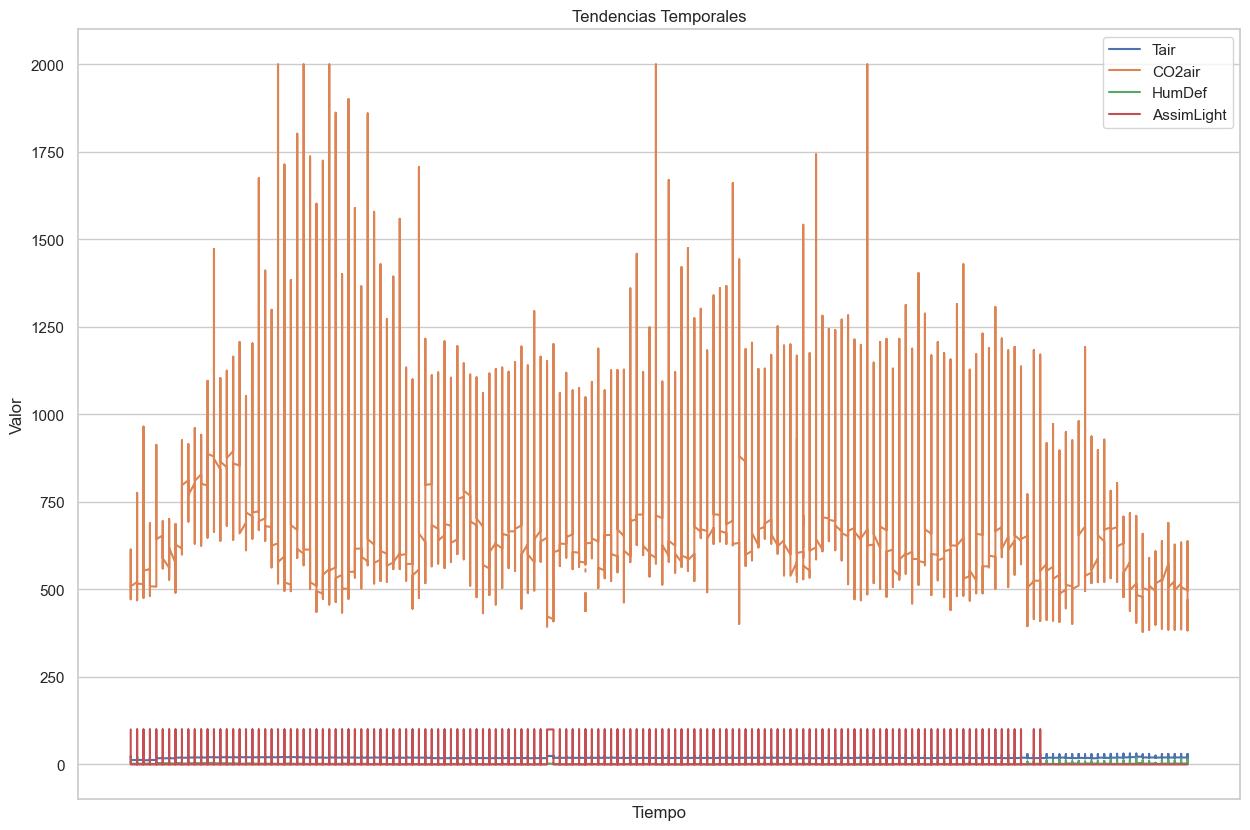

In [38]:
# algunas columnas para análisis de tendencias
columns_to_plot = ['Tair', 'CO2air', 'HumDef', 'AssimLight']  
plot_time_trends(df, columns_to_plot)